#Proyecto final
Deep Learning<br>
<strong>Alumno</strong>: Jesús Priego Morales 316132949

###Paqueterías utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import numpy as np
from keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

##Muestreo de datos

In [ ]:
#Cargamos el archivo de los datos de entrenamiento para un análisis de su contenido:
train=pd.read_csv('/content/drive/MyDrive/Proyecto_final_Deep_Learning/train.csv')
train

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [ ]:
#Realizamos la revisión con .info() para saber si hay algunos datos que sean nullos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


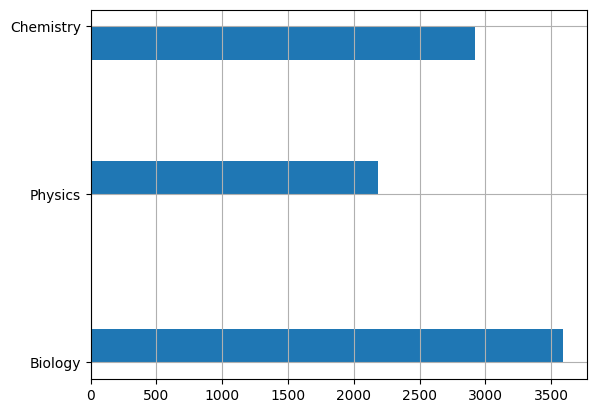

In [ ]:
#finalmente revisamos si la proporción de datos por etiqueta es más o menos equivalente para evitar un sesgo
plt.hist(train.Topic, orientation='horizontal',align='mid')
plt.grid()


In [ ]:
#hacemos lo mismo para los datos de pruebaa:
test=pd.read_csv('/content/drive/MyDrive/Proyecto_final_Deep_Learning/test.csv')
test

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1586 non-null   object
 1   Comment  1586 non-null   object
 2   Topic    1586 non-null   object
dtypes: object(3)
memory usage: 37.3+ KB


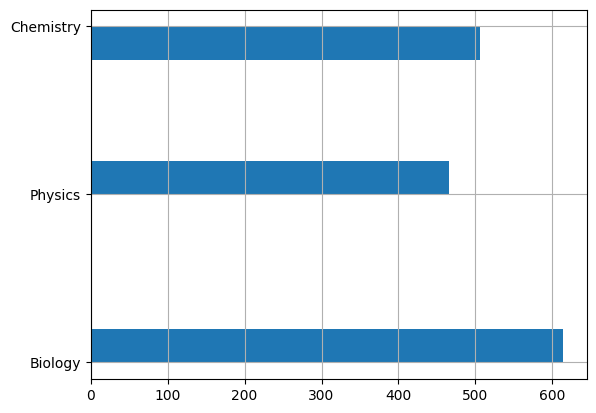

In [ ]:
plt.hist(test.Topic,orientation='horizontal',align='mid')
plt.grid()

##Red neuronal entrenada sin etiquetas, (zero-shot classification)

In [ ]:
!pip install transformers

In [ ]:
#Usamos transformers de la página huggingface
from transformers import pipeline
#Definimos el clasificador con el task:'zero-shot-classification'
clasificador=pipeline('zero-shot-classification')
#Etiquetas para clasificar
labels=['Chemistry','Physics','Biology']
#Tomamos los comentarios prueba
comentarios_prueba=list(test.Comment)
#Aplicamos el clasificador a los primeros 200 textos
resultados = clasificador(comentarios_prueba, labels)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Mostrar los resultados
for i, text in enumerate(comentarios_prueba):
    print(f"Texto {i + 1}: {text}")

    # Obtener la etiqueta con el score más alto
    max_score_index = resultados[i]["scores"].index(max(resultados[i]["scores"]))
    predicted_label = resultados[i]["labels"][max_score_index]

    print(f"Predicted Label: {predicted_label}")

Texto 1: Personally I have no idea what my IQ is. I’ve never been tested. However, the test is an outdated, inaccurate, inappropriate measuring tool that has been largely abandoned by actual science. Only Mensa cares and their members tend to be insufferable misogynistic and racist assholes. So. Ya know. Go off I guess?
Predicted Label: Biology
Texto 2: I'm skeptical. A heavier lid would be needed to build pressure, while a lighter lid is needed to move a lot with the release of pressure. I feel like I am missing something here.
Predicted Label: Physics
Texto 3: I think I have 100 cm of books on the subject. TL;DR: The problem of consciousness is universally acknowledged as one of the most important in science, tens of thousands of scientists have devoted their careers to chipping away at it, numerous Nobel laureates have turned from their original fields to tackle it, and to date, no one has solved it. \n\nI'd point you to the works of Gerald Edelman and Thomas Metzinger as the author

Veamos que pasa con el accuracy para todos los textos de prueba

In [ ]:
from sklearn.metrics import accuracy_score
true_labels=list(test.Topic)
predicted_labels = [resultados["labels"][resultados["scores"].index(max(resultados["scores"]))] for resultados in resultados]
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.64%


Observamos que a pesar de usar una red neuronal a la cual se le pide clasificar con etiquetas que no había visto, desempeñó un trabajo bastante decente.

##Red neuronal usando transformers (estructura only-encoder)

Usaremos tensorflow para definir la capa de encoding, el embeding posicional y la capa de salida de clasificación multilcase

###Preprocesamiento de datos

In [ ]:
import tensorflow as tf
#Importamos keras
from tensorflow import keras
#Importamos el multicabezar de auto-atención, capa de normalización y el dropout para evitar un sobre-entrenamiento
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
#Importamos el embeding posicional, la capa de entrada y el método para obtener la mayor información del proceso de encoding
from keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
from keras.models import Sequential, Model
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
#Mezclamoos todo para evitar una distribución anormal de textos
train=train.sample(frac=1).reset_index(drop=True)
train

,Id,Comment,Topic
0,0x24,Neither is the bacterium,Biology
1,0x26bd,I wouldn’t say brine/ice “works great” it is n...,Chemistry
2,0x32d,By having a more educated public.,Physics
3,0xc12,Start simple. \n\nModelling things like this u...,Physics
4,0x121a,... thank you for so vividly realizing my exam...,Biology
...,...,...,...
8690,0x1e69,I believe the way to get the effects of this o...,Biology
8691,0x18a0,Such a beautiful design. Poor fellow.,Biology
8692,0x1d1e,"To my knowledge, computational operations that...",Physics
8693,0x1fcf,[Cancer Center Info](https://www.cancercenter....,Biology


In [ ]:
#separamos los datos de entrenamiento en validación y entrenamiento (extrayendo de una vez sólo los textos)
train_x=np.array(train.Comment[0:8001])
validation_x=np.array(train.Comment[8000:])
test_x=np.array(test.Comment)

# Tokenizar y codificar los textos de entrenamiento, validación y prueba
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x)
tokenizer.fit_on_texts(validation_x)
tokenizer.fit_on_texts(test_x)


#restringimos a una longitud de 300 cada vector
sequence_length = 300
train_sequences = tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post')

valid_sequences = tokenizer.texts_to_sequences(validation_x)
valid_padded = pad_sequences(valid_sequences, maxlen=sequence_length, padding='post')

test_sequences = tokenizer.texts_to_sequences(test_x)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post')

print(train_padded)
print(valid_padded)
print(test_padded)

[[ 1636     6     1 ...     0     0     0]
 [   10   741   111 ...     0     0     0]
 [   49   309     3 ...     0     0     0]
 ...
 [19299 19300     8 ...     0     0     0]
 [ 2361    18   115 ...     0     0     0]
 [  116  5581     0 ...     0     0     0]]
[[ 116 5581    0 ...    0    0    0]
 [  17  102  172 ...    0    0    0]
 [  12   25   72 ... 1759  275 2095]
 ...
 [   2   37  539 ...    0    0    0]
 [ 618 1381 1092 ...    0    0    0]
 [  23   34 7800 ...    0    0    0]]
[[1295   10   20 ...    0    0    0]
 [  85 4489    3 ...    0    0    0]
 [  10   52   10 ...    0    0    0]
 ...
 [  21    8  100 ...    0    0    0]
 [  88  114  129 ...    0    0    0]
 [   1  344  416 ...    0    0    0]]


In [ ]:
#Extracción de las etiquetas de entrenamiento, validación  y prueba codificadas
from sklearn.preprocessing import LabelEncoder

train_labels = np.array(train.Topic[0:8001])
validation_labels =np.array(train.Topic[8000:])
test_labels=np.array(test.Topic)

#codificación de las etiquetas
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.fit_transform(validation_labels)
test_labels_encoded = label_encoder.fit_transform(test_labels)


print(train_labels_encoded)
print(validation_labels_encoded)
print(test_labels_encoded)

[0 1 2 ... 1 1 1]
[1 0 2 0 2 0 0 2 0 2 2 1 0 1 2 0 1 2 0 1 2 1 0 2 2 1 1 0 0 0 0 0 1 1 1 0 2
 1 0 1 0 0 1 0 2 1 0 0 2 2 0 1 0 0 1 2 2 1 0 2 1 1 2 1 1 0 0 0 0 1 0 0 1 0
 0 0 2 1 2 0 0 1 1 2 1 0 1 2 1 1 0 1 0 0 2 1 1 1 1 0 2 1 2 0 2 0 1 0 1 1 0
 2 0 0 1 2 1 2 1 1 0 0 0 0 2 2 0 2 0 1 1 0 2 1 1 2 0 2 1 2 2 1 1 0 1 1 0 2
 0 2 2 1 1 0 0 1 1 2 2 0 0 2 0 1 0 2 1 0 0 2 0 0 2 0 0 0 1 2 0 0 1 0 0 0 0
 1 1 1 0 1 0 2 1 2 2 0 1 1 1 0 0 0 0 0 1 2 0 0 0 0 0 1 2 0 1 0 2 1 1 0 0 1
 0 0 0 1 0 1 1 1 2 0 2 1 0 0 0 2 1 1 1 2 0 0 0 0 2 1 0 1 2 1 1 2 0 2 1 0 2
 0 2 2 1 1 2 0 0 1 0 2 1 1 1 2 2 0 1 1 2 1 1 0 1 1 0 2 0 1 1 0 2 2 1 0 1 0
 0 0 2 1 1 0 0 0 0 2 1 0 1 0 1 1 2 0 1 0 2 0 0 0 0 0 0 1 0 1 0 2 1 0 1 1 1
 1 2 1 1 2 1 2 2 2 0 2 2 1 0 0 1 0 2 1 0 0 2 1 1 0 2 1 2 1 2 1 2 0 1 2 0 2
 0 0 0 0 2 1 0 1 0 0 2 1 0 1 0 1 2 1 0 1 0 2 0 0 2 1 1 2 0 1 0 0 2 0 1 2 0
 1 0 0 2 0 0 2 1 2 0 1 1 1 1 0 1 1 0 1 2 0 2 2 0 0 0 0 0 0 0 0 0 2 1 0 0 1
 0 1 0 0 2 1 0 0 2 0 0 1 2 2 1 0 1 2 2 1 2 2 0 0 2 1 1 2 0 0 0 1 0 1 0 1 2
 1 2 1 

###Contrucción de la red

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

#Definimos la capa encoder de transoformers como un objeto
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
#definimos la capa de embedding posicional
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config


In [ ]:
vocab_size = 30000
embed_dim = 256
num_heads = 2
dense_dim = 32
#Definición de la arquitectura de la red
inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.85)(x)
#x = Dense(128, activation="relu")(x)
#x = Dropout(0.8)(x)
#x = Dense(128, activation="relu")(x)
#x = Dropout(0.8)(x)
#x = Dense(64, activation="relu")(x)
outputs = layers.Dense(3, activation="sigmoid")(x)

#compilar la red
model = keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posi  (None, None, 256)         7756800   
 tionalEmbedding)                                                
                                                                 
 transformer_encoder (Trans  (None, None, 256)         543776    
 formerEncoder)                                                  
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

###Entrenamiento

In [ ]:

history = model.fit(train_padded, train_labels_encoded,
                    batch_size=32,
                    epochs=3,
                    validation_data=(valid_padded, validation_labels_encoded)
                   )

Epoch 1/3
251/251 [==============================] - 58s 164ms/step - loss: 1.6338 - accuracy: 0.3850 - val_loss: 0.9939 - val_accuracy: 0.4835
Epoch 2/3
251/251 [==============================] - 18s 70ms/step - loss: 0.7811 - accuracy: 0.6589 - val_loss: 0.6771 - val_accuracy: 0.7209
Epoch 3/3
251/251 [==============================] - 13s 52ms/step - loss: 0.3528 - accuracy: 0.8658 - val_loss: 0.7745 - val_accuracy: 0.7424


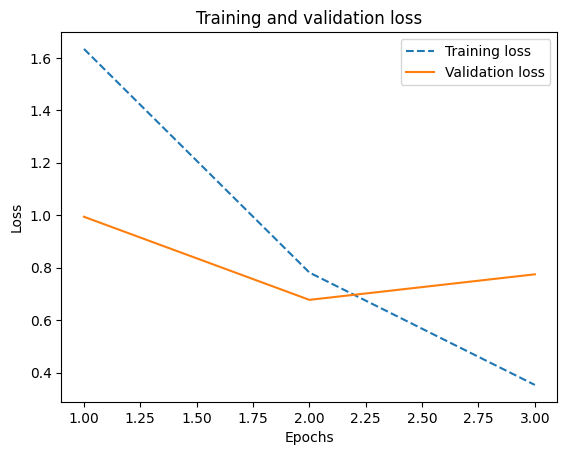

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "--", label="Training loss")
plt.plot(epochs, val_loss, "-", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

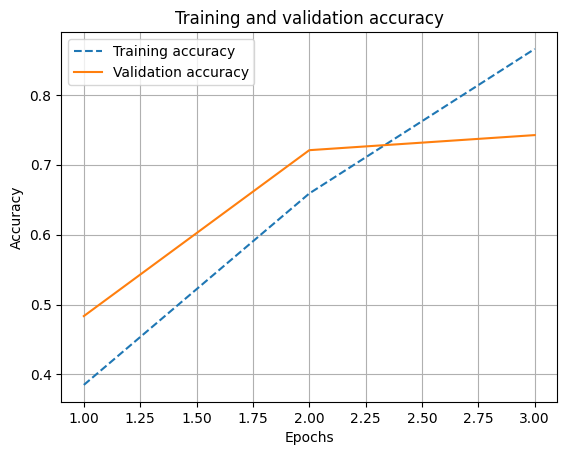

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "--", label="Training accuracy")
plt.plot(epochs, val_acc, "-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

###Predicciones

In [ ]:
#predicciones
predicciones=model.predict(test_padded)

50/50 [==============================] - 1s 13ms/step


In [ ]:
predicciones

array([[0.9719267 , 0.04598771, 0.03442011],
       [0.441551  , 0.01230744, 0.92421114],
       [0.883868  , 0.09397987, 0.06759515],
       ...,
       [0.5016558 , 0.72873014, 0.01798563],
       [0.30963802, 0.16300873, 0.45437858],
       [0.07122362, 0.09458228, 0.94027585]], dtype=float32)

In [ ]:
test_labels_encoded

array([0, 2, 0, ..., 1, 0, 2])

In [ ]:
model.evaluate(test_padded, test_labels_encoded)

50/50 [==============================] - 1s 14ms/step - loss: 0.5093 - accuracy: 0.8329


[0.5093119144439697, 0.8329129815101624]

**Observamos una mejoría notable en las predicciones de casi 10%**

##Fine-tunning de una red neuronal pre-entrenada Transfer_Learning(BERT)

In [ ]:
#Instralamos algunas paqueterúas necesarias
!pip install transformers datasets evaluate
!pip install accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
#Esta parte es para que torch interactúe con el entorno
import os
os.environ["TORCH_USE_CUDA_DSA"] = "1"


In [ ]:
#Importamos algunas librerías más incluyendo los tokenizadores, y elentrenador
import tensorflow as tf
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from datasets import Dataset
import evaluate

In [ ]:
#Revolvemos los datos de entrenamiento
train=train.sample(frac=1).reset_index(drop=True)

In [ ]:
#En ésta parte convertimos las variables categóricas en numéricas usando .map()
mapeo={'Biology': 1, 'Physics': 2, 'Chemistry': 3}
train['Topic']=train['Topic'].map(mapeo)
#Además eliminamos la columna de ID que no aporta nada
train.drop('Id',axis=1,inplace=True)
train=train[0:500]
#Cambiamos el nombre de los Topics por Label
train.rename(columns={'Topic':'label'},inplace=True)

#Hacemos exactamente lo mismo con los datos de test
test['Topic']=test['Topic'].map(mapeo)
test.drop('Id',axis=1,inplace=True)
test.rename(columns={'Topic':'label'},inplace=True)
test=test[0:500]
train

,Comment,label
0,What a mess,2
1,"...yeah, there's two things here that other pe...",2
2,But...***why?***,3
3,Ok thank,2
4,You cant breathe in pure O2; it has to be with...,1
...,...,...
495,One day my eyebrow started burning like all he...,1
496,If you eat it you’ll get bigger,1
497,I am increasingly interested in the prospect o...,3
498,"Yeah, don’t listen to this person. I’m finishi...",3


In [ ]:
test

,Comment,label
0,Personally I have no idea what my IQ is. I’ve ...,1
1,I'm skeptical. A heavier lid would be needed t...,2
2,I think I have 100 cm of books on the subject....,1
3,Is chemistry hard in uni. Ive read somewhere t...,3
4,"In addition to the other comment, you can crit...",2
...,...,...
495,>I would of thought intuitively that air resis...,2
496,"Wandered over from /r/homebrew, and honestly t...",1
497,What I specifically did was write notes then l...,3
498,All it is saying specifically is that it in th...,1


In [ ]:
#Hugging face tiene su propio data set que funciona mejor con las librerías ya descargadas
hg_train_data=Dataset.from_pandas(train)
hg_test_data=Dataset.from_pandas(test)

In [ ]:
hg_train_data[0]

{'Comment': 'What a mess', 'label': 2}

In [ ]:
#Definimos el tokenizador usando el modelo preentrnado Bert
tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')
tokenizer

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
#Definimos una función para mapearla en todos los textos de los datasets
def tokenize_dataset(data):
  return tokenizer(data['Comment'],
                   max_length=20,
                   truncation=True,
                   padding='max_length')

In [ ]:
dataset_train=hg_train_data.map(tokenize_dataset)
dataset_test=hg_train_data.map(tokenize_dataset)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
#Observamos que el tokenizador creó 3 nuevas columnas
#inputs_ids, que convierte las palabras y espacios en tokens
#token_type_ids, debido a la que Bert está entrenado para predecir cuando una frase le sigue a una primera. 0 para la primer frase, 1 para la segunda, en este caso siempre es 0
#attention_mask, 1 para aquellos tokens a los que vamos a prestarle atención, en este caso todos los tokens distintos de cero los acompaña una attention_mask=1
print(dataset_train)
print(dataset_test)

Dataset({
    features: ['Comment', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 500
})
Dataset({
    features: ['Comment', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 500
})


In [ ]:
dataset_train[0]

{'Comment': 'What a mess',
 'label': 2,
 'input_ids': [101,
  1327,
  170,
  6477,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [ ]:
#Cargamos el modelo y determinamos el número de clases para que el mismmo modelo defina la capa de salida
import torch
model=AutoModelForSequenceClassification.from_pretrained('bert-base-cased',num_labels=3)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Definmos los argumentos de entrenamiento, así como definir si queremos guardar los nuevos pesos y donde guardarlos
training_args=TrainingArguments(
    output_dir="./sentiment_transfer_learning_transformer/",
    logging_dir='./sentiment_transfer_learning_transformer/logs',
    logging_strategy='epoch',
    logging_steps=100,
    num_train_epochs=2,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    learning_rate=5e-6,
    seed=42,
    save_strategy='epoch',
    save_steps=100,
    evaluation_strategy='epoch',
    eval_steps=100,
    load_best_model_at_end=True,
    full_determinism=True)


In [ ]:
#Definimos una función que nos calcule la métrica en cada paso
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
#entrenamos el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)])

trainer.train()

RuntimeError: ignored

In [ ]:
print(torch.version.cuda)
print(torch.cuda.is_available())


11.8
True
